In [15]:
import os
import scipy
import pandas as pd
pd.options.display.max_rows = 10
pd.options.display.float_format = '${:,.2f}'.format
import numpy as np
import requests
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pickle
plt.style.use('seaborn')
%matplotlib inline

In [16]:
def scrape_data(url):
    try:
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "html5lib")
        return soup
    except:
        print("Data is unavailable.")

In [17]:
soup = scrape_data('https://www.wholesalesolar.com/list-grid-tie-packages')

In [18]:
components = [element.text for element in soup.find_all('td')]

In [19]:
n = 9
packages = [components[i * n:(i + 1) * n] for i in range((len(components) + n - 1) // n )]

In [20]:
columns = ['System','SKU','Array Size','Monthly Output','Modules','Inverter','Price','MOD OEM',' INV OEM']
df = pd.DataFrame(packages,columns=columns)

In [21]:
df.head(10)

,System,SKU,Array Size,Monthly Output,Modules,Inverter,Price,MOD OEM,INV OEM
0,2.07 kW Grid Tied Solar System with Enphase IQ...,1895203,2.1 kW,310.5 kWh,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,6 Enphase IQ7+ Micro Inverters,"$3,664.00",astronergy-solar,enphase
1,Solar Sky 2.07 kW Grid Tied Solar System with ...,1892025,2.1 kW,310.5 kWh,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,1 SMA Sunny Boy 3.8-US-41 Inverter,"$3,907.00",astronergy-solar,sma
2,2.19 kW Grid Tied Solar System with Enphase IQ...,1895403,2.2 kW,328.5 kWh,6 Heliene 365 Black Mono Panels,6 Enphase IQ7A Micro Inverters,"$4,138.00",heliene,enphase
3,SMA 2.16 kW Grid Tied Solar System with SMA In...,1892123,2.2 kW,324.0 kWh,6 REC 360 Black Mono Panels,1 SMA Sunny Boy 3.8-US-41 Inverter,"$4,549.00",rec,sma
4,2.56 kW Grid Tied Solar System with SolarEdge ...,1890502,2.6 kW,384.0 kWh,8 Astronergy Solar CHSM60M-HC-320 Silver Mono ...,1 SolarEdge SE3800H HD-Wave SetApp Enabled Inv...,"$4,667.50",astronergy-solar,solaredge
5,2.76 kW Grid Tied Solar System with SolarEdge ...,1890902,2.8 kW,414.0 kWh,8 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,1 SolarEdge SE3800H HD-Wave SetApp Enabled Inv...,"$4,987.50",astronergy-solar,solaredge
6,3.2 kW Grid Tied Solar System with Enphase IQ7...,1894210,3.2 kW,480.0 kWh,10 Astronergy Solar CHSM60M-HC-320 Silver Mono...,10 Enphase IQ7+ Micro Inverters,"$5,169.95",astronergy-solar,enphase
7,2.92 kW Grid Tied Solar System with SolarEdge ...,1892565,2.9 kW,438.0 kWh,8 Heliene 365 Black Mono Panels,1 SolarEdge SE3800H HD-Wave SetApp Enabled Inv...,"$5,364.00",heliene,solaredge
8,3.2 kW Grid Tied Solar System with SolarEdge a...,1890500,3.2 kW,480.0 kWh,10 Astronergy Solar CHSM60M-HC-320 Silver Mono...,1 SolarEdge SE3800H HD-Wave SetApp Enabled Inv...,"$5,366.50",astronergy-solar,solaredge
9,Solar Sky 3.84 kW Grid Tied Solar System with ...,1890400,3.8 kW,576.0 kWh,12 Astronergy Solar CHSM60M-HC-320 Silver Mono...,1 SMA Sunny Boy 5.0-US Inverter,"$5,501.00",astronergy-solar,sma


In [22]:
df.dtypes

System            object
SKU               object
Array Size        object
Monthly Output    object
Modules           object
Inverter          object
Price             object
MOD OEM           object
 INV OEM          object
dtype: object

In [23]:
df['Price'] = df['Price'].str.replace('$','').str.split().apply(lambda x: float(x[0].replace(',', '')))

In [24]:
df['Monthly Output'] = df['Monthly Output'].astype('str').str.replace('kWh','')

In [25]:
df['Monthly Output'] = pd.to_numeric(df['Monthly Output'], errors='ignore')

Text(0, 0.5, 'Price')

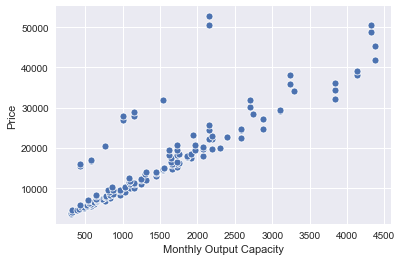

In [26]:
x = df['Monthly Output']
y = df['Price']
sns.scatterplot(x,y)
plt.xlabel("Monthly Output Capacity")
plt.ylabel("Price")

In [27]:
df['MOD OEM'].astype('category')

0      astronergy-solar
1      astronergy-solar
2               heliene
3                   rec
4      astronergy-solar
             ...       
133             heliene
134                 rec
135    astronergy-solar
136                 rec
137             heliene
Name: MOD OEM, Length: 138, dtype: category
Categories (3, object): [astronergy-solar, heliene, rec]

In [28]:
df.corr(method='pearson')

,Monthly Output,Price
Monthly Output,$1.00,$0.87
Price,$0.87,$1.00


In [29]:
def get_module_quantity(modules):
    modules.split()
    value = modules[0]
    return int(value)

In [30]:
df['Module Qty'] = df['Modules'].apply(get_module_quantity)

In [31]:
df = df.rename(columns=lambda x: x.strip())

In [32]:
df['INV OEM'] = df['INV OEM'].apply(lambda x: 'fronius' if x == '' else x)

In [33]:
df['INV OEM'].astype('category')

0              enphase
1                  sma
2              enphase
3                  sma
4            solaredge
            ...       
133            enphase
134          solaredge
135    four-star-solar
136            enphase
137            fronius
Name: INV OEM, Length: 138, dtype: category
Categories (5, object): [enphase, four-star-solar, fronius, sma, solaredge]

In [34]:
df['MOD OEM'].astype('category')

0      astronergy-solar
1      astronergy-solar
2               heliene
3                   rec
4      astronergy-solar
             ...       
133             heliene
134                 rec
135    astronergy-solar
136                 rec
137             heliene
Name: MOD OEM, Length: 138, dtype: category
Categories (3, object): [astronergy-solar, heliene, rec]

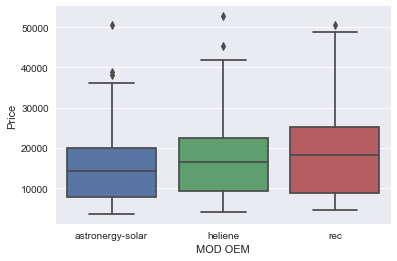

In [35]:
sns.boxplot(x='MOD OEM',y='Price',data=df)

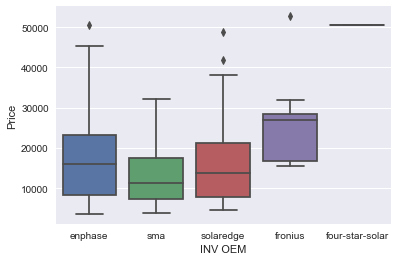

In [36]:
sns.boxplot(x='INV OEM',y='Price',data=df)

In [37]:
df.groupby(['INV OEM','MOD OEM']).size()

INV OEM          MOD OEM         
enphase          astronergy-solar    26
                 heliene             14
                 rec                  9
four-star-solar  astronergy-solar     1
fronius          astronergy-solar     4
                                     ..
sma              heliene              7
                 rec                  6
solaredge        astronergy-solar    28
                 heliene              7
                 rec                 12
Length: 12, dtype: int64

In [38]:
df['INV OEM'].dropna

<bound method Series.dropna of 0              enphase
1                  sma
2              enphase
3                  sma
4            solaredge
            ...       
133            enphase
134          solaredge
135    four-star-solar
136            enphase
137            fronius
Name: INV OEM, Length: 138, dtype: object>

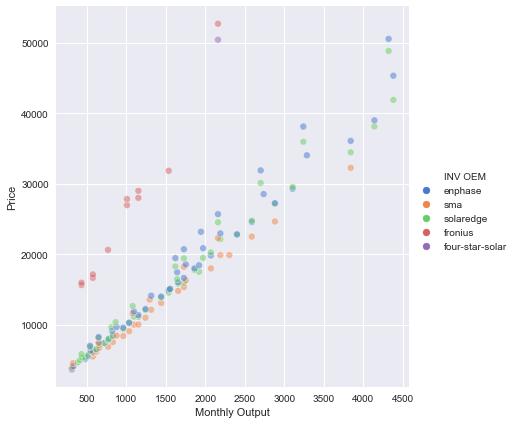

In [39]:
sns.relplot(x="Monthly Output", y="Price", hue="INV OEM", alpha=.5, palette="muted", 
            height=6, data=df)
plt.savefig('invoem.png')
plt.show()

In [40]:
Y = df['Price']
X = df['Monthly Output']
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              1716.
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                    2.35e-79
Time:                        14:33:48   Log-Likelihood:                         -1385.4
No. Observations:                 138   AIC:                                      2773.
Df Residuals:                     137   BIC:                                      2776.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Monthly Output    10.5632      0.255     41.420      0.000      10.059      11.067
==============================================================================
Omnibus:                      107.723   Durbin-Watson:                   1.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              764.630
Skew:                           2.888   Prob(JB):                    9.18e-167
Kurtosis:                      12.981   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
def array_size(rating):
    rating.split()
    value = rating[0]
    return int(value)

In [28]:
df['Array Size'] = df['Array Size'].apply(array_size)

In [29]:
df.head()

,System,SKU,Array Size,Monthly Output,Modules,Inverter,Price,MOD OEM,INV OEM,Module Qty
0,1.8 kW Grid Tied Solar System with Enphase IQ7...,1895201,1,$270.00,6 Heliene 300 Black Mono Panels,6 Enphase IQ7+ Micro Inverters,"$3,645.95",heliene,enphase,6
1,2.07 kW Grid Tied Solar System with Enphase IQ...,1895203,2,$310.50,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,6 Enphase IQ7+ Micro Inverters,"$3,664.00",astronergy-solar,enphase,6
2,Solar Sky 2.07 kW Grid Tied Solar System with ...,1892025,2,$310.50,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,1 SMA Sunny Boy 3.8-US Inverter,"$3,807.00",astronergy-solar,sma,6
3,SMA 2.4 kW Grid Tied Solar System with SMA Inv...,1892399,2,$360.00,8 Heliene 300 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,"$4,273.00",heliene,sma,8
4,SMA 2.13 kW Grid Tied Solar System with SMA In...,1892123,2,$319.50,6 REC 355 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,"$4,449.00",rec,sma,6


In [36]:
df.dtypes

System            object
SKU               object
Array Size        object
Monthly Output    object
Modules           object
Inverter          object
Price             object
MOD OEM           object
INV OEM           object
Module Qty        object
dtype: object

In [32]:
df['Monthly Output'] = df['Monthly Output'].astype('str').str.strip('$')
df['Price'] = df['Price'].astype('str').str.strip('$')
df['Module Qty'] = df['Module Qty'].astype('str').str.strip('$')
df['Array Size'] = df['Array Size'].astype('str').str.strip('$')

In [33]:
df['Monthly Output']

0       270.0
1       310.5
2       310.5
3       360.0
4       319.5
        ...  
115    4140.0
116    4140.0
117    4260.0
118    4260.0
119    2025.0
Name: Monthly Output, Length: 120, dtype: object

In [34]:
df

,System,SKU,Array Size,Monthly Output,Modules,Inverter,Price,MOD OEM,INV OEM,Module Qty
0,1.8 kW Grid Tied Solar System with Enphase IQ7...,1895201,1,270.0,6 Heliene 300 Black Mono Panels,6 Enphase IQ7+ Micro Inverters,3645.95,heliene,enphase,6
1,2.07 kW Grid Tied Solar System with Enphase IQ...,1895203,2,310.5,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,6 Enphase IQ7+ Micro Inverters,3664.0,astronergy-solar,enphase,6
2,Solar Sky 2.07 kW Grid Tied Solar System with ...,1892025,2,310.5,6 Astronergy Solar CHSM6612P/HV-345 Silver Pol...,1 SMA Sunny Boy 3.8-US Inverter,3807.0,astronergy-solar,sma,6
3,SMA 2.4 kW Grid Tied Solar System with SMA Inv...,1892399,2,360.0,8 Heliene 300 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,4273.0,heliene,sma,8
4,SMA 2.13 kW Grid Tied Solar System with SMA In...,1892123,2,319.5,6 REC 355 Black Mono Panels,1 SMA Sunny Boy 3.8-US Inverter,4449.0,rec,sma,6
...,...,...,...,...,...,...,...,...,...,...
115,27.6 kW Grid Tied Solar System with SolarEdge ...,1890941,2,4140.0,80 Astronergy Solar CHSM6612P/HV-345 Silver Po...,2 SolarEdge SE11400H HD Wave SetApp Enabled In...,38145.0,astronergy-solar,solaredge,8
116,27.6 kW Grid Tied Solar System with Enphase IQ...,1894379,2,4140.0,80 Astronergy Solar CHSM6612P/HV-345 Silver Po...,80 Enphase IQ7+ Micro Inverters,39003.0,astronergy-solar,enphase,8
117,28.4 kW Grid Tied Solar System with SolarEdge ...,1891611,2,4260.0,80 REC 355 Black Mono Panels,3 SolarEdge SE10000H HD-Wave SetApp Enabled In...,48852.0,rec,solaredge,8
118,28.4 kW Grid Tied Solar System with Enphase IQ...,1895480,2,4260.0,80 REC 355 Black Mono Panels,80 Enphase IQ7A Micro Inverters,50560.0,rec,enphase,8
